<a href="https://colab.research.google.com/github/kurtlee1984/Deep_Leaning/blob/main/Cifar10_gap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.datasets.cifar10 import load_data
(x_train, y_train), (x_test, y_test) = load_data()

170500096/170498071 [==============================] - 11s 0us/step


In [2]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [3]:
names = [
    "airplane",									
    "automobile", 										
    "bird", 										
    "cat", 										
    "deer", 										
    "dog", 										
    "frog", 										
    "horse", 										
    "ship", 										
    "truck"
]

frog


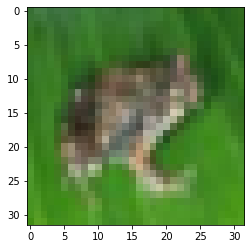

In [4]:
import matplotlib.pyplot as plt
import random
idx = random.randint(0, 49999)
ans = y_train[idx][0]
print(names[ans])
plt.imshow(x_train[idx])

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.layers import Dense, Flatten, Dropout
layers = [
    # 3 * 3 * 3(一個) * 64 + 64(bias) = 1792
    Conv2D(64, 3, activation="relu", padding="same", input_shape=(32, 32, 3)),
    Conv2D(64, 3, activation="relu", padding="same"),
    MaxPooling2D(),
    # 3 * 3 * 64(一個) * 128 + 128(bias) = 73856
    Conv2D(128, 3, activation="relu", padding="same"),
    Conv2D(128, 3, activation="relu", padding="same"),
    MaxPooling2D(),
    Conv2D(256, 3, activation="relu", padding="same"),
    Conv2D(256, 3, activation="relu", padding="same"),
    GlobalAveragePooling2D(),
    Dense(10, activation="softmax")
]
model = Sequential(layers)
model.summary() 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 256)         2

In [7]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
model.compile(
    loss=SparseCategoricalCrossentropy(),
    optimizer=Adam(),
    metrics=["accuracy"]
)

In [8]:
x_train_norm = x_train / 255.0
x_test_norm = x_test / 255.0

In [9]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
callbacks = [
    EarlyStopping(patience=5, restore_best_weights=True),
    ModelCheckpoint("cnn.h5", save_best_only=True)
]
model.fit(x_train_norm,
          y_train,
          validation_split=0.1,
          epochs=100,
          batch_size=200,
          verbose=2,
          callbacks=callbacks)

Epoch 1/100
225/225 - 47s - loss: 1.8116 - accuracy: 0.3084 - val_loss: 1.5240 - val_accuracy: 0.4340
Epoch 2/100
225/225 - 16s - loss: 1.3383 - accuracy: 0.5078 - val_loss: 1.2105 - val_accuracy: 0.5592
Epoch 3/100
225/225 - 16s - loss: 1.1073 - accuracy: 0.5975 - val_loss: 0.9990 - val_accuracy: 0.6490
Epoch 4/100
225/225 - 16s - loss: 0.9491 - accuracy: 0.6624 - val_loss: 0.8681 - val_accuracy: 0.6938
Epoch 5/100
225/225 - 16s - loss: 0.8307 - accuracy: 0.7062 - val_loss: 0.7777 - val_accuracy: 0.7256
Epoch 6/100
225/225 - 16s - loss: 0.7301 - accuracy: 0.7417 - val_loss: 0.6983 - val_accuracy: 0.7640
Epoch 7/100
225/225 - 16s - loss: 0.6431 - accuracy: 0.7744 - val_loss: 0.6701 - val_accuracy: 0.7688
Epoch 8/100
225/225 - 16s - loss: 0.5722 - accuracy: 0.8015 - val_loss: 0.6734 - val_accuracy: 0.7652
Epoch 9/100
225/225 - 16s - loss: 0.5230 - accuracy: 0.8183 - val_loss: 0.6023 - val_accuracy: 0.7972
Epoch 10/100
225/225 - 16s - loss: 0.4650 - accuracy: 0.8380 - val_loss: 0.5746 - 

In [10]:
model.evaluate(x_test_norm, y_test)

313/313 [==============================] - 3s 9ms/step - loss: 0.5885 - accuracy: 0.8065


[0.5885283946990967, 0.8065000176429749]

In [11]:
import pandas as pd
from sklearn.metrics import confusion_matrix
y_test_r = y_test.reshape(-1)
pre = model.predict_classes(x_test_norm)
mat = confusion_matrix(y_test_r, pre)
pd.DataFrame(mat, 
             columns=["{}(預測)".format(names[i]) for i in range(10)],
             index=["{}(正確)".format(names[i]) for i in range(10)])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


,airplane(預測),automobile(預測),bird(預測),cat(預測),deer(預測),dog(預測),frog(預測),horse(預測),ship(預測),truck(預測)
airplane(正確),845,14,43,8,14,1,3,10,46,16
automobile(正確),12,912,6,2,1,3,3,3,20,38
bird(正確),43,2,770,20,75,28,23,27,9,3
cat(正確),19,5,103,589,56,137,40,41,7,3
deer(正確),15,3,51,24,836,17,12,37,4,1
dog(正確),7,2,73,95,47,700,10,61,3,2
frog(正確),6,2,86,46,56,13,769,10,9,3
horse(正確),12,0,25,14,50,19,1,873,1,5
ship(正確),48,14,8,8,5,2,2,1,903,9
truck(正確),35,46,10,7,4,5,1,9,15,868


In [12]:
print(y_test.shape)
print(pre.shape)
# -1: 叫他幫你算 10000 * 1 = -1(?)
print(y_test_r.shape)

(10000, 1)
(10000,)
(10000,)


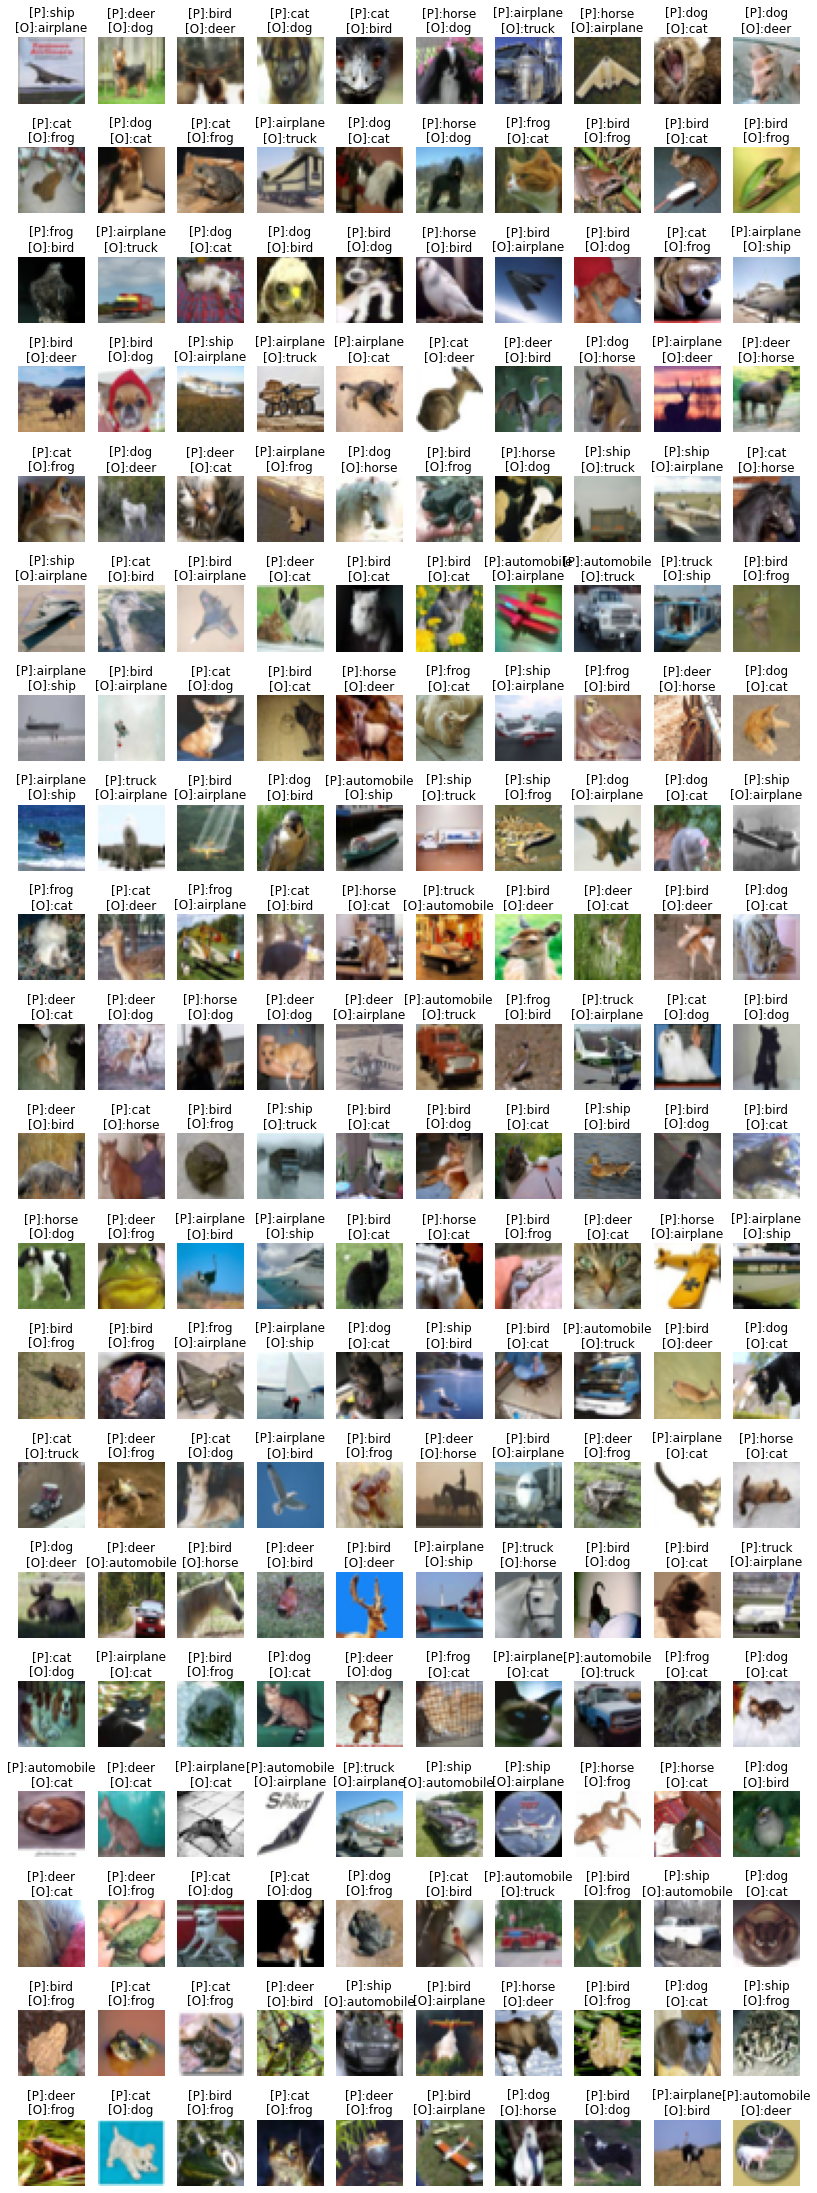

In [13]:
import numpy as np
idx = np.nonzero(pre != y_test_r)[0]
idx = idx[:200]
# np.nonzero([[0, 2, 0], [0, 0, 3]])
false_pre = pre[idx]
false_label = y_test_r[idx] 
false_img = x_test[idx]

plt.figure(figsize=(14, 42))
width = 10
height = len(idx) // width + 1
for i in range(len(false_img)):
    plt.subplot(height, width, i+1)
    title = "[P]:{}\n[O]:{}".format(names[false_pre[i]], names[false_label[i]])
    plt.title(title)
    plt.axis("off")
    plt.imshow(false_img[i])

輸入網址:https://pic.pimg.tw/sheng1378/1383219879-2598159896.jpg
airplane 的機率: 0.0
automobile 的機率: 0.0
bird 的機率: 0.859
cat 的機率: 0.001
deer 的機率: 0.029
dog 的機率: 0.096
frog 的機率: 0.006
horse 的機率: 0.008
ship 的機率: 0.0
truck 的機率: 0.0


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


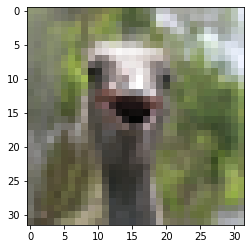

In [17]:
import requests
from PIL import Image
url = input("輸入網址:")
response = requests.get(url, verify=False, stream=True)
img = Image.open(response.raw)
img = img.resize((32, 32)).convert("RGB")
img_np = np.array(img)
img_norm = np.array([img_np]) / 255
pre = model.predict(img_norm)[0]
for n, p in zip(names, pre):
    print(n, "的機率:", round(p, 3))
plt.imshow(img)